In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
tweet_df = pd.read_csv('tweetstotal_clean.csv',encoding= 'utf-8')
tweet_df['Date'] = pd.to_datetime(tweet_df['Date'])
tweet_df.set_index('Date', inplace=True)

### Data cleaning of 2020-2022

In [3]:
df2020 = pd.read_csv('tweets2020.csv',encoding= 'utf-8')

In [4]:
df2021 = pd.read_csv('tweets2021.csv',encoding= 'utf-8')

In [5]:
df2022 = pd.read_csv('tweets2022.csv',encoding= 'utf-8')

In [6]:
df_3y = df2020.append(df2021).append(df2022)
df_3y.head(5)

/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_2379/747152622.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_3y = df2020.append(df2021).append(df2022)


,Unnamed: 0,Time,Author ID,Tweet
0,0,2020-11-29 17:31:54+00:00,138784917,RT because while I'm not gay this happens in S...
1,1,2020-09-17 15:30:33+00:00,752273484,RT @pauriahcarey: The homophobes over at We Ar...
2,2,2020-09-17 06:55:01+00:00,322378987,RT @pauriahcarey: The homophobes over at We Ar...
3,3,2020-09-17 00:54:36+00:00,2791195074,RT @pauriahcarey: The homophobes over at We Ar...
4,4,2020-09-16 22:42:13+00:00,96694094,RT @pauriahcarey: The homophobes over at We Ar...


In [7]:
df_3y = df_3y.drop(columns=['Unnamed: 0'])
df_3y.head(5)

,Time,Author ID,Tweet
0,2020-11-29 17:31:54+00:00,138784917,RT because while I'm not gay this happens in S...
1,2020-09-17 15:30:33+00:00,752273484,RT @pauriahcarey: The homophobes over at We Ar...
2,2020-09-17 06:55:01+00:00,322378987,RT @pauriahcarey: The homophobes over at We Ar...
3,2020-09-17 00:54:36+00:00,2791195074,RT @pauriahcarey: The homophobes over at We Ar...
4,2020-09-16 22:42:13+00:00,96694094,RT @pauriahcarey: The homophobes over at We Ar...


In [8]:
df_3y.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1567     True
1568    False
1569    False
1570    False
1571    False
Length: 4644, dtype: bool

In [9]:
df_3y = df_3y.drop_duplicates()

In [10]:
df_3y[df_3y.duplicated()]

,Time,Author ID,Tweet


In [11]:
df_3y['Date'] = df_3y['Time'].map(lambda x:x.split(' ')[0])
#df_3y['Time_1'] = df_3y['Time'].map(lambda x:x.split(' ')[1])

df_3y['Date'] = pd.to_datetime(df_3y['Date'])

df_3y.set_index('Date',inplace=True)

df_3y['Year'] = df_3y.index.year
df_3y['Month'] = df_3y.index.month
df_3y['Weekday'] = df_3y.index.weekday


df_3y.head(5).append(df_3y.tail(5))

/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_2379/77451390.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_3y.head(5).append(df_3y.tail(5))


,Time,Author ID,Tweet,Year,Month,Weekday
Date,,,,,,
2020-11-29,2020-11-29 17:31:54+00:00,138784917,RT because while I'm not gay this happens in S...,2020,11,6
2020-09-17,2020-09-17 15:30:33+00:00,752273484,RT @pauriahcarey: The homophobes over at We Ar...,2020,9,3
2020-09-17,2020-09-17 06:55:01+00:00,322378987,RT @pauriahcarey: The homophobes over at We Ar...,2020,9,3
2020-09-17,2020-09-17 00:54:36+00:00,2791195074,RT @pauriahcarey: The homophobes over at We Ar...,2020,9,3
2020-09-16,2020-09-16 22:42:13+00:00,96694094,RT @pauriahcarey: The homophobes over at We Ar...,2020,9,2
2022-02-28,2022-02-28 11:59:03+00:00,27987687,Singapore court refuses to overturn archaic ga...,2022,2,0
2022-02-28,2022-02-28 11:48:30+00:00,3158178364,RT @HumanDignityT: BREAKING: Partial victory a...,2022,2,0
2022-02-28,2022-02-28 11:32:08+00:00,23029296,RT @afa_singapore: AfA Singapore is deeply dis...,2022,2,0
2022-02-28,2022-02-28 11:31:03+00:00,881337963505868800,RT @kixes: The conclusion from #Singapore’s Co...,2022,2,0


In [12]:
# clean the news content by using clean method from hero package
import texthero as hero

In [13]:
#create custom pipeline
custom_pipeline = [hero.preprocessing.fillna,
                   hero.preprocessing.lowercase,
                   hero.preprocessing.remove_whitespace,
                   hero.preprocessing.remove_urls,
                   hero.preprocessing.remove_stopwords,
                   hero.preprocessing.remove_punctuation,
                   hero.preprocessing.remove_diacritics,
                   hero.preprocessing.remove_digits
                   ]

df_3y['clean_Tweet'] = df_3y['Tweet'].pipe(hero.clean, custom_pipeline)

In [14]:
df_3y.head(3).append(df_3y.tail(3))

/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_2379/2228596155.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_3y.head(3).append(df_3y.tail(3))


,Time,Author ID,Tweet,Year,Month,Weekday,clean_Tweet
Date,,,,,,,
2020-11-29,2020-11-29 17:31:54+00:00,138784917,RT because while I'm not gay this happens in S...,2020,11,6,rt gay happens singapore gay communit...
2020-09-17,2020-09-17 15:30:33+00:00,752273484,RT @pauriahcarey: The homophobes over at We Ar...,2020,9,3,rt pauriahcarey homophobes pinkdot si...
2020-09-17,2020-09-17 06:55:01+00:00,322378987,RT @pauriahcarey: The homophobes over at We Ar...,2020,9,3,rt pauriahcarey homophobes pinkdot si...
2022-02-28,2022-02-28 11:32:08+00:00,23029296,RT @afa_singapore: AfA Singapore is deeply dis...,2022,2,0,rt afa singapore afa singapore deeply disap...
2022-02-28,2022-02-28 11:31:03+00:00,881337963505868800,RT @kixes: The conclusion from #Singapore’s Co...,2022,2,0,rt kixes conclusion singapore court appe...
2022-02-28,2022-02-28 11:27:03+00:00,16922687,"RT @raynerkjtan: Today, the Singapore Court of...",2022,2,0,rt raynerkjtan today singapore court appe...


In [15]:
df_pre = pd.DataFrame(df_3y.index.value_counts().sort_index()).rename(columns={'Date':'Tweet Number'})
#lr_data_pre.rename(columns={'Date':'Tweet Number'})
df_pre

,Tweet Number
2020-01-01,9
2020-01-02,7
2020-01-03,10
2020-01-04,1
2020-01-05,1
...,...
2022-03-28,31
2022-03-29,22
2022-03-30,19
2022-03-31,19


# Plot for linear regression without covid-19

### Re-specify the range for training, testing and validation period

In [37]:
# Specify the range for training, testing and validation period
valid_start = '2020-10-01'
test_start =  '2021-07-01'

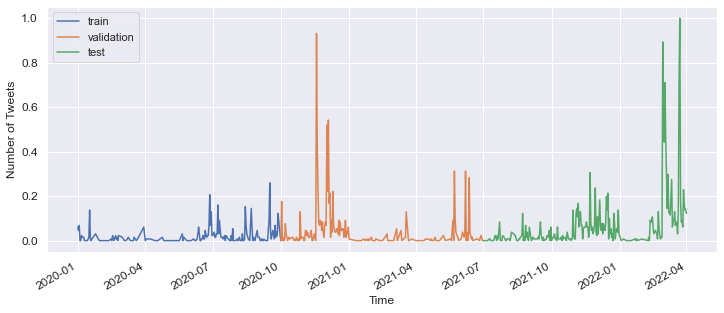

In [38]:
df_pre[: valid_start][['Tweet Number']].rename(columns={'Tweet Number':'train'}) \
    .join(df_pre[valid_start: test_start][['Tweet Number']] \
          .rename(columns={'Tweet Number':'validation'}), how='outer') \
    .join(df_pre[test_start:][['Tweet Number']].rename(columns={'Tweet Number':'test'}), how='outer') \
    .plot(y=['train', 'validation', 'test'], figsize=(12, 5), fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.show()

In [39]:
K = 5
HORIZON = 1

In [40]:
# filter the dataset to include the training period to prevent data leakage
train_df = df_pre[:valid_start].copy()

            Tweet Number
2020-01-01      0.061069
2020-01-02      0.045802
2022-03-31      0.137405
2022-04-01      0.122137


/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_2379/923400763.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df_pre.head(2).append(df_pre.tail(2)))


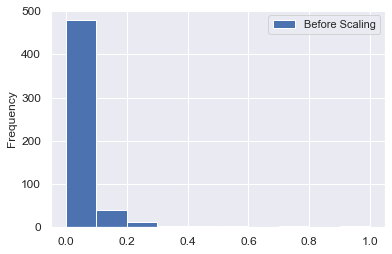

In [41]:
# Scale the time series into the range (0, 1)
from sklearn.preprocessing import MinMaxScaler #to convert values into 0 & 1 for comparing
scaler = MinMaxScaler()
df_pre[['Tweet Number']].rename(columns={'Tweet Number':'Before Scaling'}).plot.hist(bins=10, fontsize=12)

df_pre['Tweet Number'] = scaler.fit_transform(df_pre)  #fit_transform =! transform
print(df_pre.head(2).append(df_pre.tail(2))) 

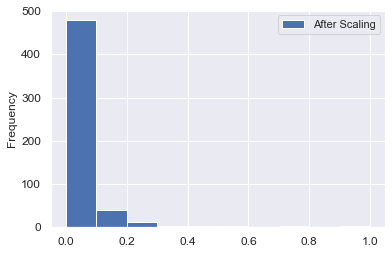

In [42]:
df_pre.rename(columns={'Tweet Number':'After Scaling'}).plot.hist(bins=10, fontsize=12)
plt.show()

In [43]:
# Based on K and H, we shift the tweet number to create the dataframe containing features x and targets y
train_shifted = df_pre.copy()
# Target Y Column: Close_t+1
train_shifted['Tweet Number_t+1'] = df_pre['Tweet Number'].shift(-1)
train_shifted.head(5)

,Tweet Number,Tweet Number_t+1
2020-01-01,0.061069,0.045802
2020-01-02,0.045802,0.068702
2020-01-03,0.068702,0.000000
2020-01-04,0.000000,0.000000
2020-01-05,0.000000,0.022901


In [44]:
for t in range(K):
    train_shifted['Tweet Number_t-{}'.format(t)] = train_shifted['Tweet Number'].shift(t)

In [45]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Tweet Number,Tweet Number_t+1,Tweet Number_t-0,Tweet Number_t-1,Tweet Number_t-2,Tweet Number_t-3,Tweet Number_t-4
2020-01-05,0.000000,0.022901,0.000000,0.000000,0.068702,0.045802,0.061069
2020-01-06,0.022901,0.015267,0.022901,0.000000,0.000000,0.068702,0.045802
2020-01-07,0.015267,0.015267,0.015267,0.022901,0.000000,0.000000,0.068702
2020-01-08,0.015267,0.015267,0.015267,0.015267,0.022901,0.000000,0.000000
2020-01-09,0.015267,0.000000,0.015267,0.015267,0.015267,0.022901,0.000000


In [46]:
y_col = ['Tweet Number_t+1']
X_cols = ['Tweet Number_t-{}'.format(idx) for idx in range(0, K)]

In [47]:
# Transform into a numpy arrays
y_train = train_shifted[y_col].values
print(y_train.shape)  
X_train = train_shifted[X_cols].values
print(X_train.shape)

(540, 1)
(540, 5)


In [48]:
from sklearn.linear_model import LinearRegression 

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
index_pre = df_pre.index.get_loc(valid_start) - K
true_valid_start = df_pre.index[index_pre]

In [51]:
val_df = df_pre[true_valid_start:test_start].copy()
val_df.head()

,Tweet Number
2020-09-26,0.022901
2020-09-27,0.122137
2020-09-28,0.091603
2020-09-29,0.053435
2020-09-30,0.022901


In [52]:
val_df['Tweet Number'] = scaler.transform(val_df)  #dont need to fit again, using previous model
print(val_df.head(2).append(val_df.tail(2)))

            Tweet Number
2020-09-26      0.022901
2020-09-27      0.122137
2021-06-30      0.000000
2021-07-01      0.000000


/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_2379/247420434.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(val_df.head(2).append(val_df.tail(2)))


In [53]:
valid_shifted = val_df.copy()
valid_shifted['Tweet Number_t+1'] = val_df['Tweet Number'].shift(-1)
for t in range(K):
     valid_shifted['Tweet Number_t-{}'.format(t)] = valid_shifted['Tweet Number'].shift(t)
valid_shifted = valid_shifted.dropna(how='any')
y_valid = valid_shifted[y_col].values
X_valid = valid_shifted[X_cols].values

In [54]:
predictions = model.predict(X_valid)
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = valid_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_valid).ravel()
eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']]) #convert values into real values 
eval_df.head()

,timestamp,h,prediction,actual
0,2020-09-30,t+1,0.038692,0.000000
1,2020-10-01,t+1,0.029176,0.175573
2,2020-10-02,t+1,0.108962,0.000000
3,2020-10-03,t+1,0.035022,0.015267
4,2020-10-04,t+1,0.028407,0.000000


# Explain the similarity between prediction trend and actual trend

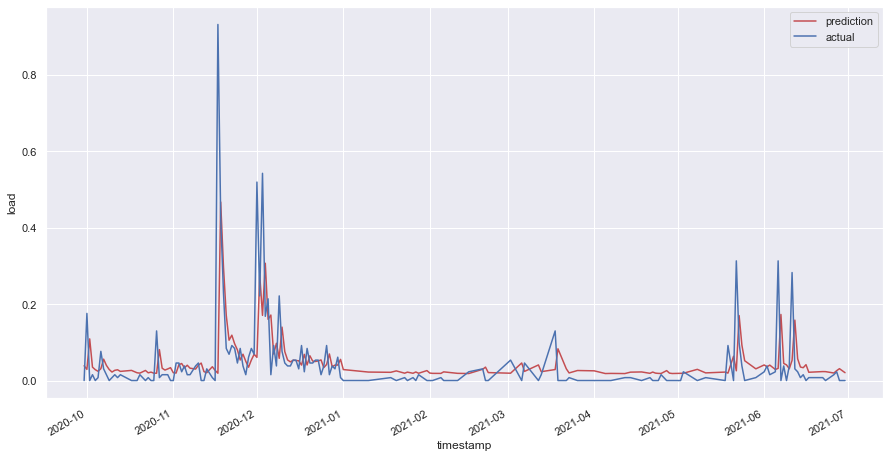

In [55]:
eval_df.plot(x='timestamp', y=['prediction', 'actual'], style=['r', 'b'], figsize=(15, 8))
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

In [56]:
# Calculate MAPE (mean average percentage error)
mape_test = np.mean(np.abs((eval_df['prediction'] - eval_df['actual']) / eval_df['actual'])) * 100
print('MAPE is %0.2f' %  mape_test)  

MAPE is inf
